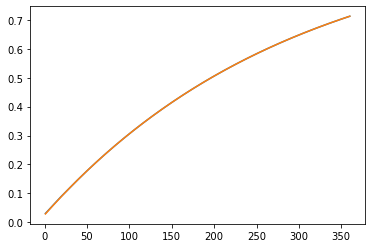

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)


z = 1  # Nombre de zéros

# n = 36  # Nombre de numéros (zéros exclus)
# M = 1000  # Nombre de trajectoires    
# N = 1000  # Nombre de tours de roulette
# f = np.zeros(n)
# f[1], f[2], f[5], f[8], f[11], f[17], f[35] = 6, 9, 22, 24, 26, 60, 37

n = 36  # Nombre de numéros (zéros exclus)
M = 100  # Nombre de trajectoires    
N = 200000  # Nombre de tours de roulette
f = np.zeros(n)
f[1], f[2], f[5], f[8], f[11], f[17], f[35] = 6, 9, 22, 24, 26, 60, 37

f /= np.sum(f)

p = lambda d: n / (n + z) / (d + 1)
p_g = 1 - f @ p(np.arange(n))

c = np.vectorize(lambda l: f[l:] @ p(np.arange(l, n)))
P = np.vectorize(lambda r: p_g * r + (f[1:] * p(np.arange(1, n))) @ (1 / r) ** np.arange(1, n))
Q = np.append(c(np.arange(n - 1, 0, -1)), -p_g)
x = np.roots(Q)
r = 1 / x

V = np.vander(x)
mu = -np.ones(x.shape) @ np.linalg.inv(V)
mu_real = -np.real(np.exp(np.sum(np.log((1 - x[:-1]) / (x[-1] - x[:-1])))))  # Quick leading term

q = np.vectorize(lambda k: 1 + np.real(mu @ r ** k))

k = np.arange(1, 10 * n + 1)
k_half = 1 + int(np.log(-1 / 2 / mu_real) / np.log(np.real(r[-1])))
q_k = q(k)

plt.plot(k, q_k)
plt.plot(k, 1 + mu_real * np.real(r[-1]) ** k)
plt.show()

In [2]:
def show_phi(u0):
    du = np.random.choice(-np.arange(-1, n), size=(M, N), replace=True, p=np.append(p_g, f * p(np.arange(n))))
    u = u0 + np.hstack((np.zeros((M, 1)), np.cumsum(du, axis=1)))
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    u_cutted = u*(u_alive)
    phi = np.mean(u_alive, axis=0)
    plt.title("Simulations Monte-Carlo de la survie d'un casino")
    plt.xlabel("nombre de tours de roulette")
    plt.ylabel("fortune (en jetons)")
    plt.plot(u.T, c='gray')
    plt.plot(u_cutted.T)
    plt.show()
    plt.title("Probabilité de non-ruine")
    plt.xlabel("nombre de tours de roulette")
    plt.ylabel("probabilité")
    plt.plot(phi)
    plt.show()

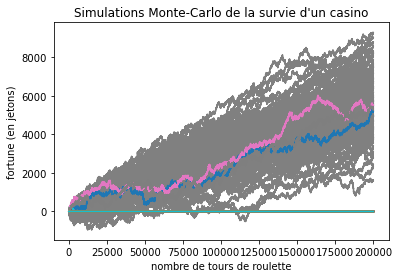

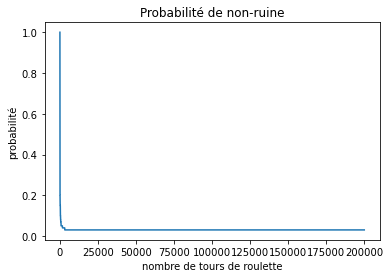

In [3]:
show_phi(1)

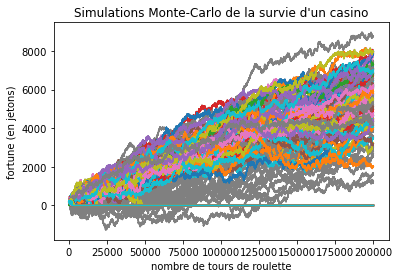

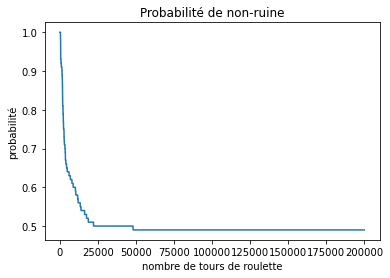

In [4]:
show_phi(k_half)

In [5]:
def phi_inf(u0):
    du = np.random.choice(-np.arange(-1, n), size=(M, N), replace=True, p=np.append(p_g, f * p(np.arange(n))))
    u = u0 + np.hstack((np.zeros((M, 1)), np.cumsum(du, axis=1)))
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    u_cutted = u*(u_alive)
    phi = np.mean(u_alive, axis=0)
    return phi[-1]

v_phi_inf = np.vectorize(phi_inf)
phi_k = v_phi_inf(k)

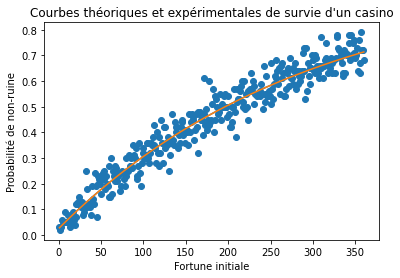

In [6]:
plt.title("Courbes théoriques et expérimentales de survie d'un casino")
plt.xlabel("Fortune initiale")
plt.ylabel("Probabilité de non-ruine")
plt.plot(k, q_k)
plt.plot(k, 1 + mu_real * np.real(r[-1]) ** k)
plt.scatter(k, phi_k)
plt.show()